In [1]:
#ARIMA is good for seasonal data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [2]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df.info

<bound method DataFrame.info of                                                  Month  \
0                                              1949-01   
1                                              1949-02   
2                                              1949-03   
3                                              1949-04   
4                                              1949-05   
..                                                 ...   
140                                            1960-09   
141                                            1960-10   
142                                            1960-11   
143                                            1960-12   
144  International airline passengers: monthly tota...   

     Thousands of Passengers  
0                      112.0  
1                      118.0  
2                      132.0  
3                      129.0  
4                      121.0  
..                       ...  
140                    508.0  
141                    

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [9]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [10]:
df.set_index("Month",inplace=True)

In [11]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

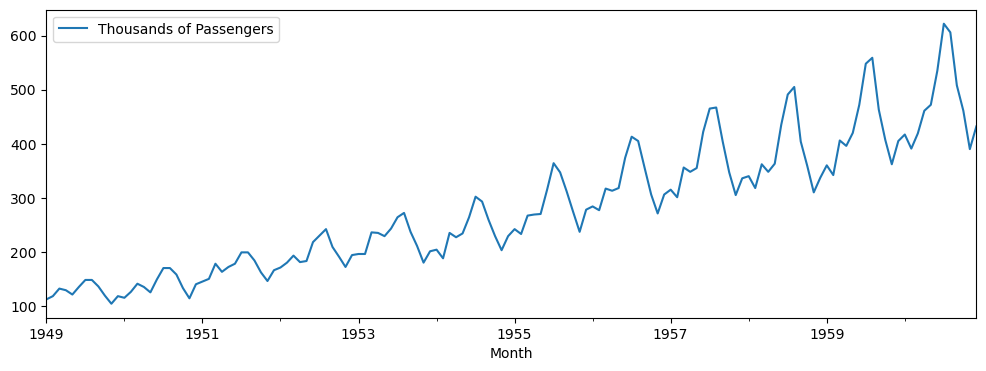

In [12]:
df.plot(figsize=(12,4))

looks like a seasonal graph

In [13]:
from statsmodels.tsa.stattools import adfuller
#this is actually the DFT test ie Dicky Fuller Test

In [14]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))    
    if result[1] <=0.05:
        print('strong evidence against null hypothesis,reject the null hypothesis,Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis,accepte the null hypothesis,time series has a unit root indicating it is non stationary')

In [15]:
adf_test(df['Thousands of Passengers'])

ADF Statistics:0.8153688792060597
p-value:0.9918802434376411
weak evidence against null hypothesis,accepte the null hypothesis,time series has a unit root indicating it is non stationary


In [16]:
# Use Technique Differencing
df['Passengers First Difference'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [17]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [18]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics:-2.829266824169992
p-value:0.0542132902838265
weak evidence against null hypothesis,accepte the null hypothesis,time series has a unit root indicating it is non stationary


In [19]:
#AGgain Using Technique differencing (SEcond Difference)
df['Passengers Second Difference'] = df['Passengers First Difference'] - df['Passengers First Difference'].shift(1)

In [20]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics:-16.384231542468527
p-value:2.732891850014085e-29
strong evidence against null hypothesis,reject the null hypothesis,Data has no unit root and is stationary


In [21]:
## 12 month -- as it is seasonal data
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [22]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics:-3.3830207264924805
p-value:0.011551493085514982
strong evidence against null hypothesis,reject the null hypothesis,Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

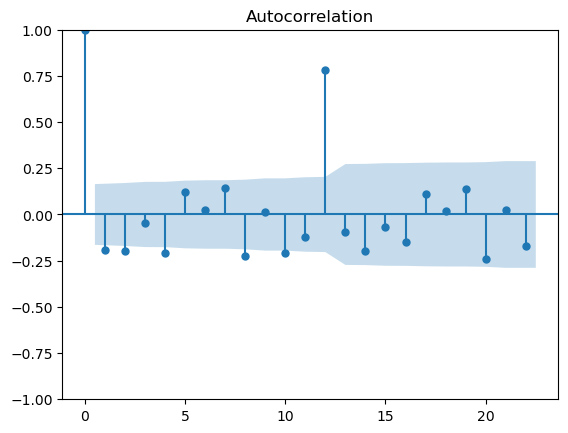

In [24]:
acf=plot_acf(df['Passengers Second Difference'].dropna())
#q=7

F:\okok\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


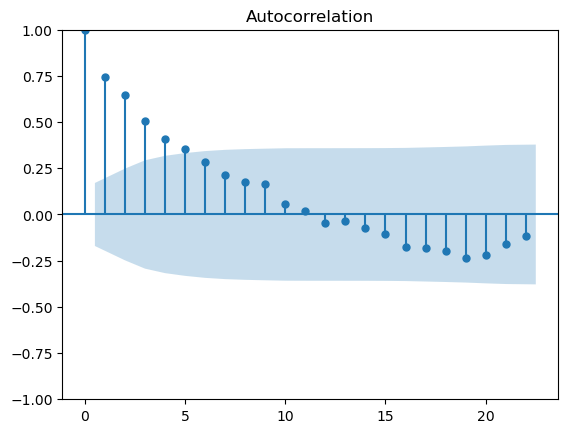

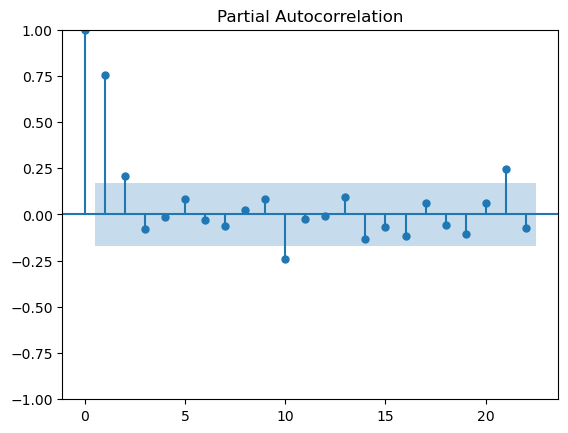

In [25]:
#we see q in acf and p in pacf
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
#q=6
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())
#p=2 or p=10

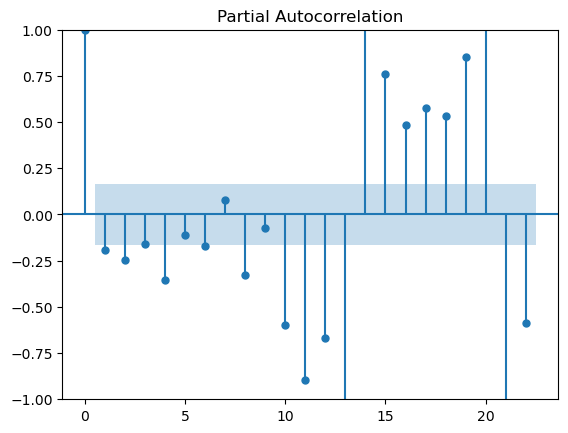

In [26]:
result = plot_pacf(df["Passengers Second Difference"].dropna())


In [27]:
# SPlit train and test data

In [28]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [29]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [30]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end + timedelta(days=1):test_dataset_end]

### Prediction

In [31]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [32]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## Creating ARIMA Model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [35]:
model1 = ARIMA(train_data['Thousands of Passengers'],order=(10,2,10)) #2=p,0=q

F:\okok\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\okok\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\okok\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
model1_fit = model1.fit()

F:\okok\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 10)   Log Likelihood                -308.572
Date:                     Sun, 01 Sep 2024   AIC                            659.145
Time:                             15:13:20   BIC                            709.686
Sample:                         01-01-1949   HQIC                           679.436
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2262      0.171      1.326      0.185      -0.108       0.560
ar.L2         -1.0787      0.159     -6.769      0.000      -1.391      -0.766
ar.L3          0.2658      0.239      1.112      0.266      -0.203       0.734
ar.L4         -1.0815      0.226     -4.780      0.000      -1.525      -0.638
ar.L5          0.1637      0.258      0.634      0.526      -0.343       0.670
ar.L6         -0.8303      0.212     -3.911      0.000      -1.246      -0.414
ar.L7         -0.0514      0.184     -0.279      0.780      -0.413       0.310
ar.L8         -0.7999      0.163     -4.893      0.000      -1.120      -0.479
ar.L9         -0.0794      0.139     -0.569      0.569      -0.353       0.194
ar.L10        -0.7199      0.120     -5.983      0.000      -0.956      -0.484
ma.L1         -1.4322      0.273     -5.244      0.000      -1.967      -0.897
ma.L2          1.4352      0.497      2.889      0.004       0.462       2.409
ma.L3         -1.7198      0.586     -2.934      0.003      -2.869      -0.571
ma.L4          1.8330      0.738      2.482      0.013       0.386       3.280
ma.L5         -1.6164      0.848     -1.905      0.057      -3.279       0.046
ma.L6          1.2756      0.811      1.574      0.116      -0.313       2.865
ma.L7         -1.0398      0.670     -1.553      0.120      -2.352       0.272
ma.L8          0.7346      0.557      1.318      0.188      -0.358       1.827
ma.L9         -0.5029      0.443     -1.134      0.257      -1.372       0.366
ma.L10         0.0850      0.265      0.321      0.748      -0.434       0.604
sigma2        85.8450     18.787      4.570      0.000      49.024     122.666
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.71   Prob(JB):                         0.21
Heteroskedasticity (H):               1.87   Skew:                             0.47
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [39]:
pred=model1_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [40]:
residuals

Month
1956-01-01     -4.901888
1956-02-01     -0.550921
1956-03-01     27.548623
1956-04-01     13.473177
1956-05-01     15.413220
1956-06-01     24.957530
1956-07-01     19.301214
1956-08-01     33.421433
1956-09-01      9.817262
1956-10-01     -1.006060
1956-11-01     -1.835268
1956-12-01      2.969369
1957-01-01     -7.303854
1957-02-01     -4.473197
1957-03-01     42.865774
1957-04-01     22.260142
1957-05-01     21.907234
1957-06-01     40.120368
1957-07-01     43.811966
1957-08-01     68.861349
1957-09-01     33.022636
1957-10-01      6.994872
1957-11-01     -3.312523
1957-12-01      4.676001
1958-01-01    -12.627219
1958-02-01    -15.766676
1958-03-01     24.945706
1958-04-01     -5.121686
1958-05-01     -1.172463
1958-06-01     22.769078
1958-07-01     41.615883
1958-08-01     79.900171
1958-09-01      6.744195
1958-10-01    -13.266902
1958-11-01    -33.497063
1958-12-01    -23.970519
1959-01-01    -21.737452
1959-02-01    -19.856903
1959-03-01     44.410994
1959-04-01     14.9

<Axes: ylabel='Density'>

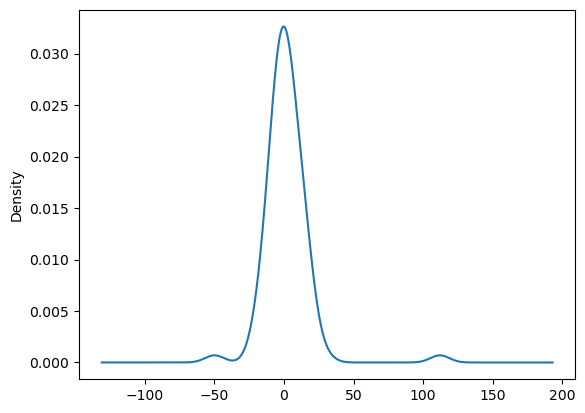

In [41]:
model1_fit.resid.plot(kind='kde')

In [42]:
test_data['Predicted_ARIMA']=pred

C:\Users\HP\AppData\Local\Temp\ipykernel_5416\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

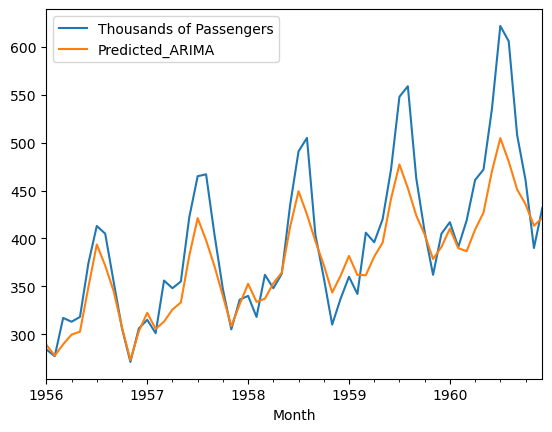

In [43]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

## Creating a SARIMAX model

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model_sarimax=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

F:\okok\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
F:\okok\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
model_sarimax_fit=model_sarimax.fit()

F:\okok\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 01 Sep 2024   AIC                            548.481
Time:                                     15:37:55   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,480.401363
1960-09-01,508.0,-98.0,-82.0,45.0,451.136864
1960-10-01,461.0,-47.0,51.0,54.0,435.738025
1960-11-01,390.0,-71.0,-24.0,28.0,413.278750
1960-12-01,432.0,42.0,113.0,27.0,421.528074


In [51]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [53]:
pred_Sarima=model_sarimax_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

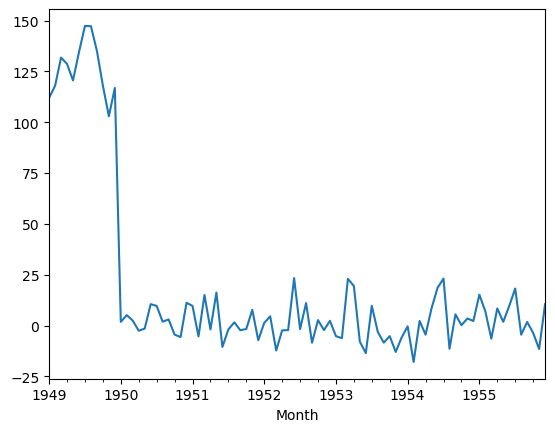

In [55]:
model_sarimax_fit.resid.plot()

<Axes: ylabel='Density'>

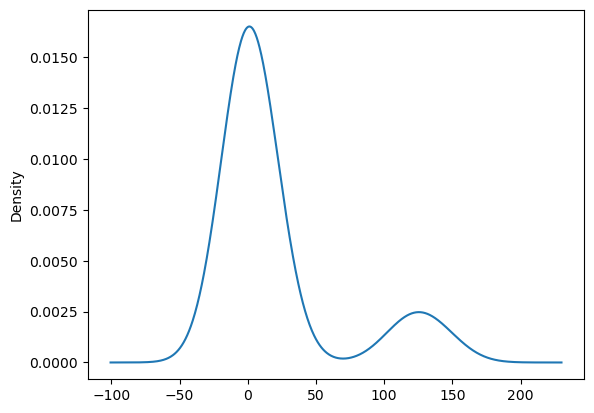

In [56]:
model_sarimax_fit.resid.plot(kind='kde')

In [57]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\HP\AppData\Local\Temp\ipykernel_5416\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [58]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,288.901888,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,277.550921,NaN
1956-03-01,317.0,40.0,47.0,50.0,289.451377,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,299.526823,NaN
1956-05-01,318.0,5.0,9.0,48.0,302.586780,NaN
1956-06-01,374.0,56.0,51.0,59.0,349.042470,NaN
1956-07-01,413.0,39.0,-17.0,49.0,393.698786,403.397378
1956-08-01,405.0,-8.0,-47.0,58.0,371.578567,385.070356
1956-09-01,355.0,-50.0,-42.0,43.0,345.182738,349.444809


<Axes: xlabel='Month'>

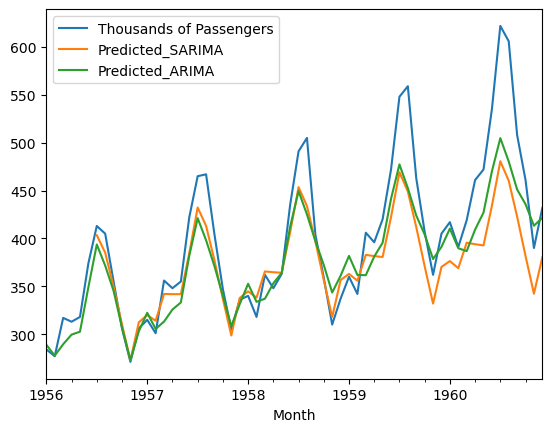

In [59]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()